In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 1. Numerical variables in separate set

In [3]:
numericals = customer_df.select_dtypes(np.number)

In [4]:
len(numericals.columns)

8

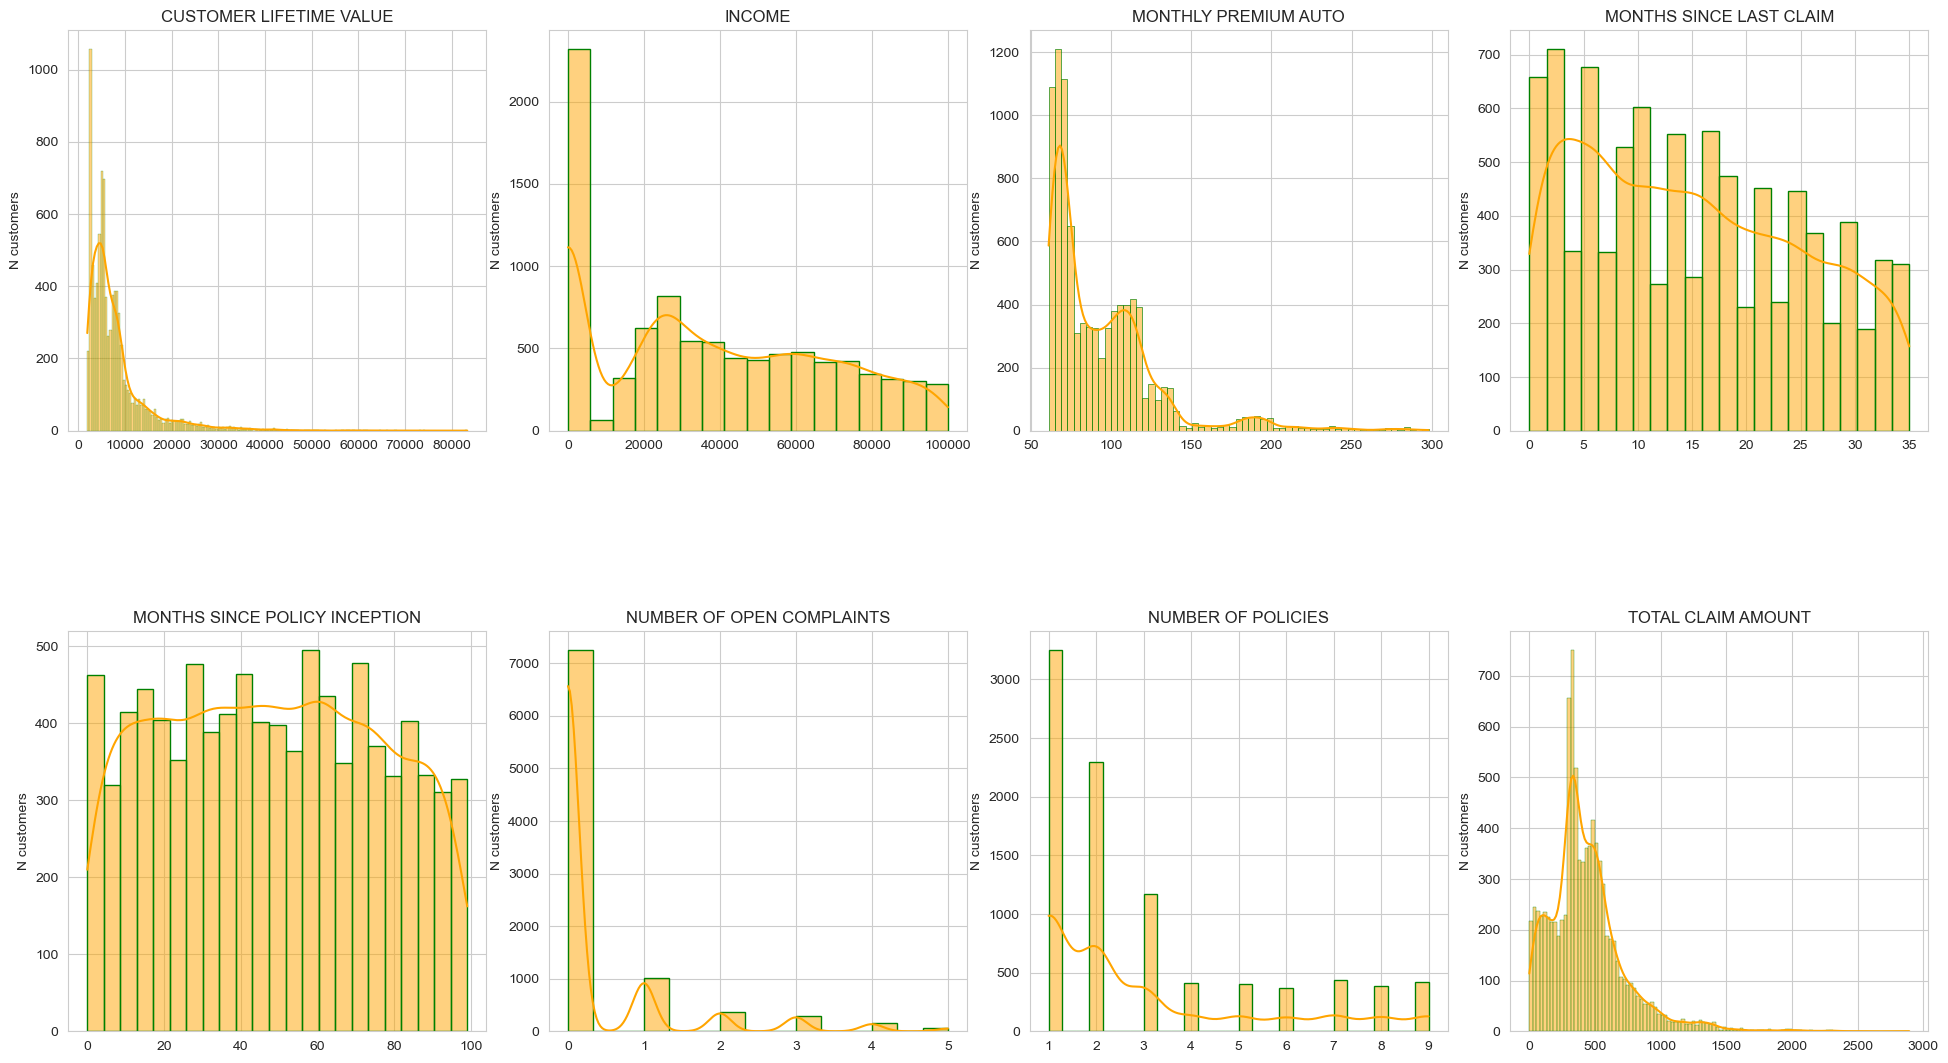

In [5]:
fig, axes = plt.subplots(2,4, figsize = (24,13))
plt.subplots_adjust(wspace = 0.15, hspace=0.5)

for col, ax in zip(numericals.columns, axes.flat):
    sns.histplot(numericals[col], color = 'orange', edgecolor = 'green', kde = True, ax = ax).set(xlabel = '', ylabel = 'N customers', title = col.upper())
plt.show()

#### None of the distributions of the numerical variables is normal or exponential.

### 3. Checking if various transformations change that observation

- with MinMaxScaler

In [6]:
num1 = numericals.copy()    # working on a copy will be more functional since different scenarios need to be tested
transformer = MinMaxScaler().fit(num1)
num1_minmax = transformer.transform(num1)

In [7]:
num1_minmax = pd.DataFrame(num1_minmax, columns=num1.columns)
num1_minmax.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


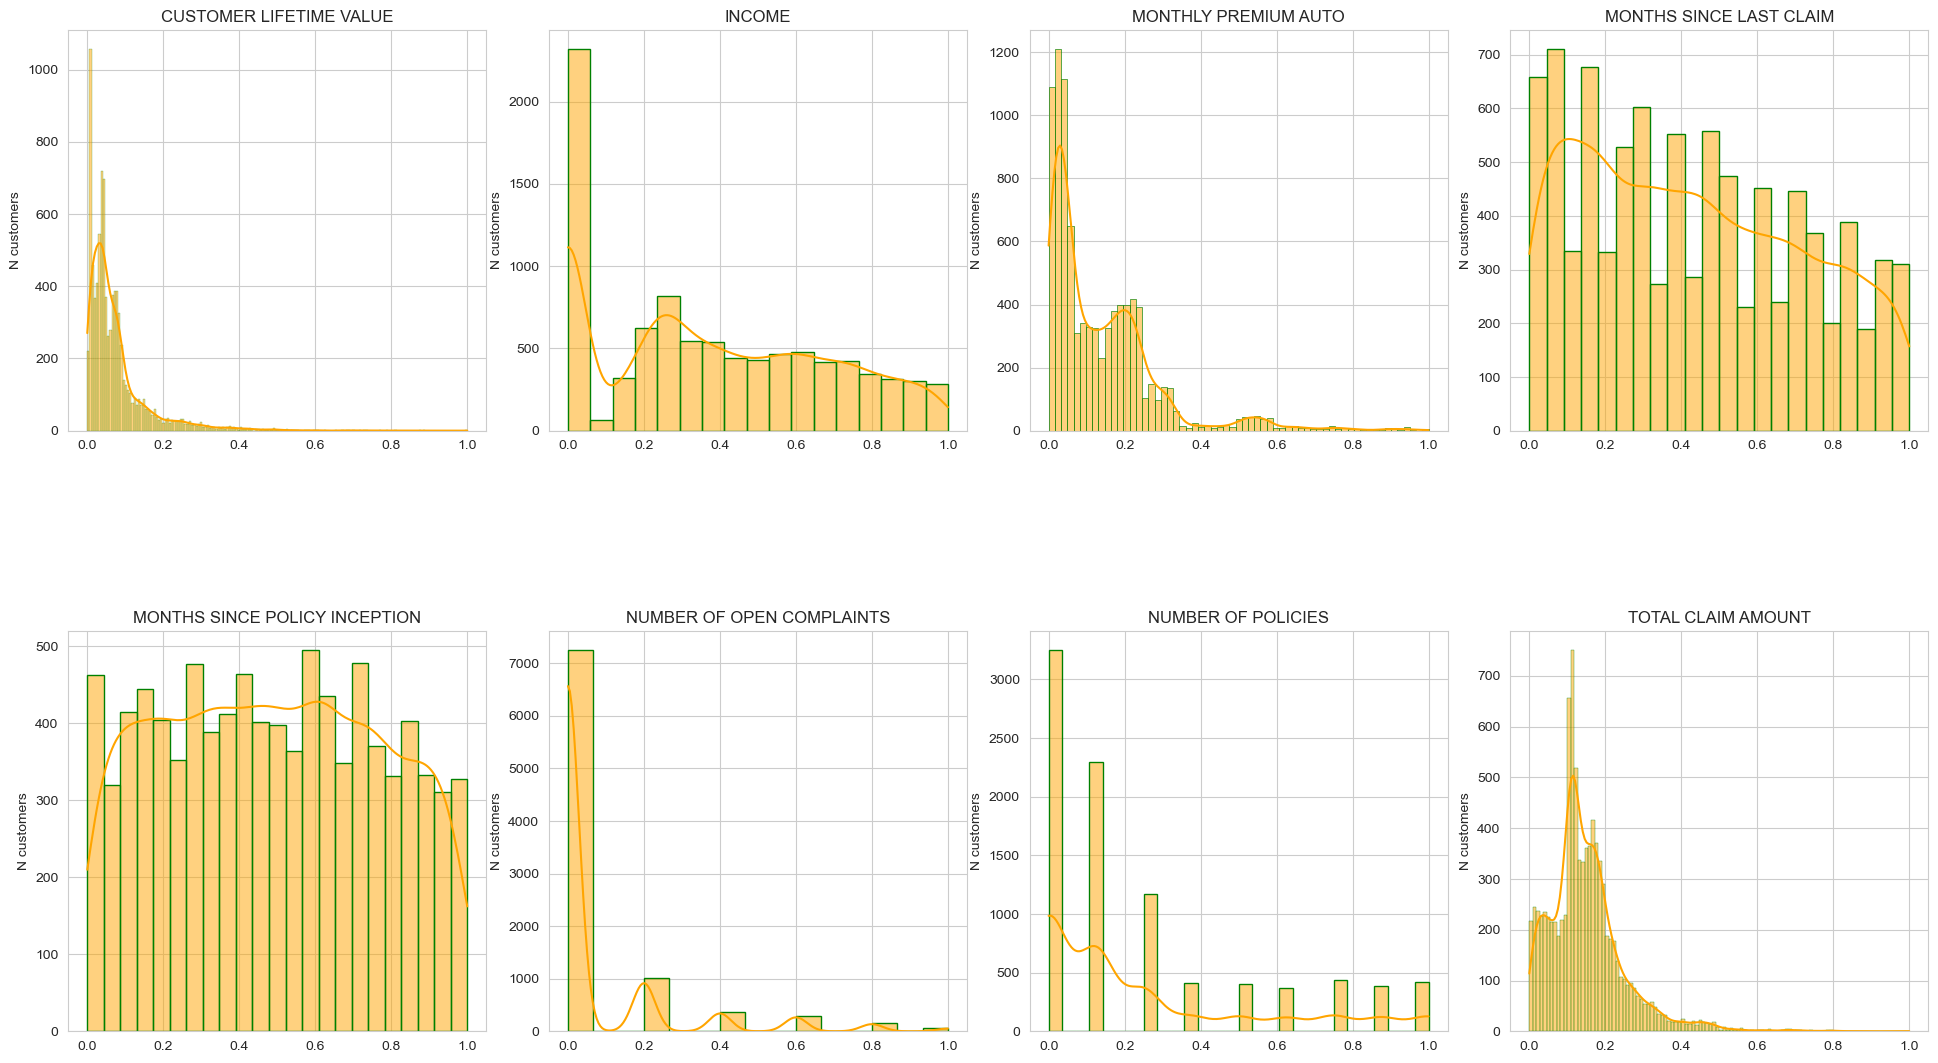

In [8]:
fig, axes = plt.subplots(2,4, figsize = (24,13))
plt.subplots_adjust(wspace = 0.15, hspace=0.5)

for col, ax in zip(num1_minmax.columns, axes.flat):
    sns.histplot(num1_minmax[col], color = 'orange', edgecolor = 'green', kde = True, ax = ax).set(xlabel = '', ylabel = 'N customers', title = col.upper())
plt.show()

#### *The only obvious changes have to do with the scale of values, as expected*

- with StandardScaler

In [9]:
num2 = numericals.copy()
transformer = StandardScaler().fit(num2)
num2_stand = transformer.transform(num2)

In [10]:
num2_stand = pd.DataFrame(num2_stand, columns=num2.columns)
num2_stand.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


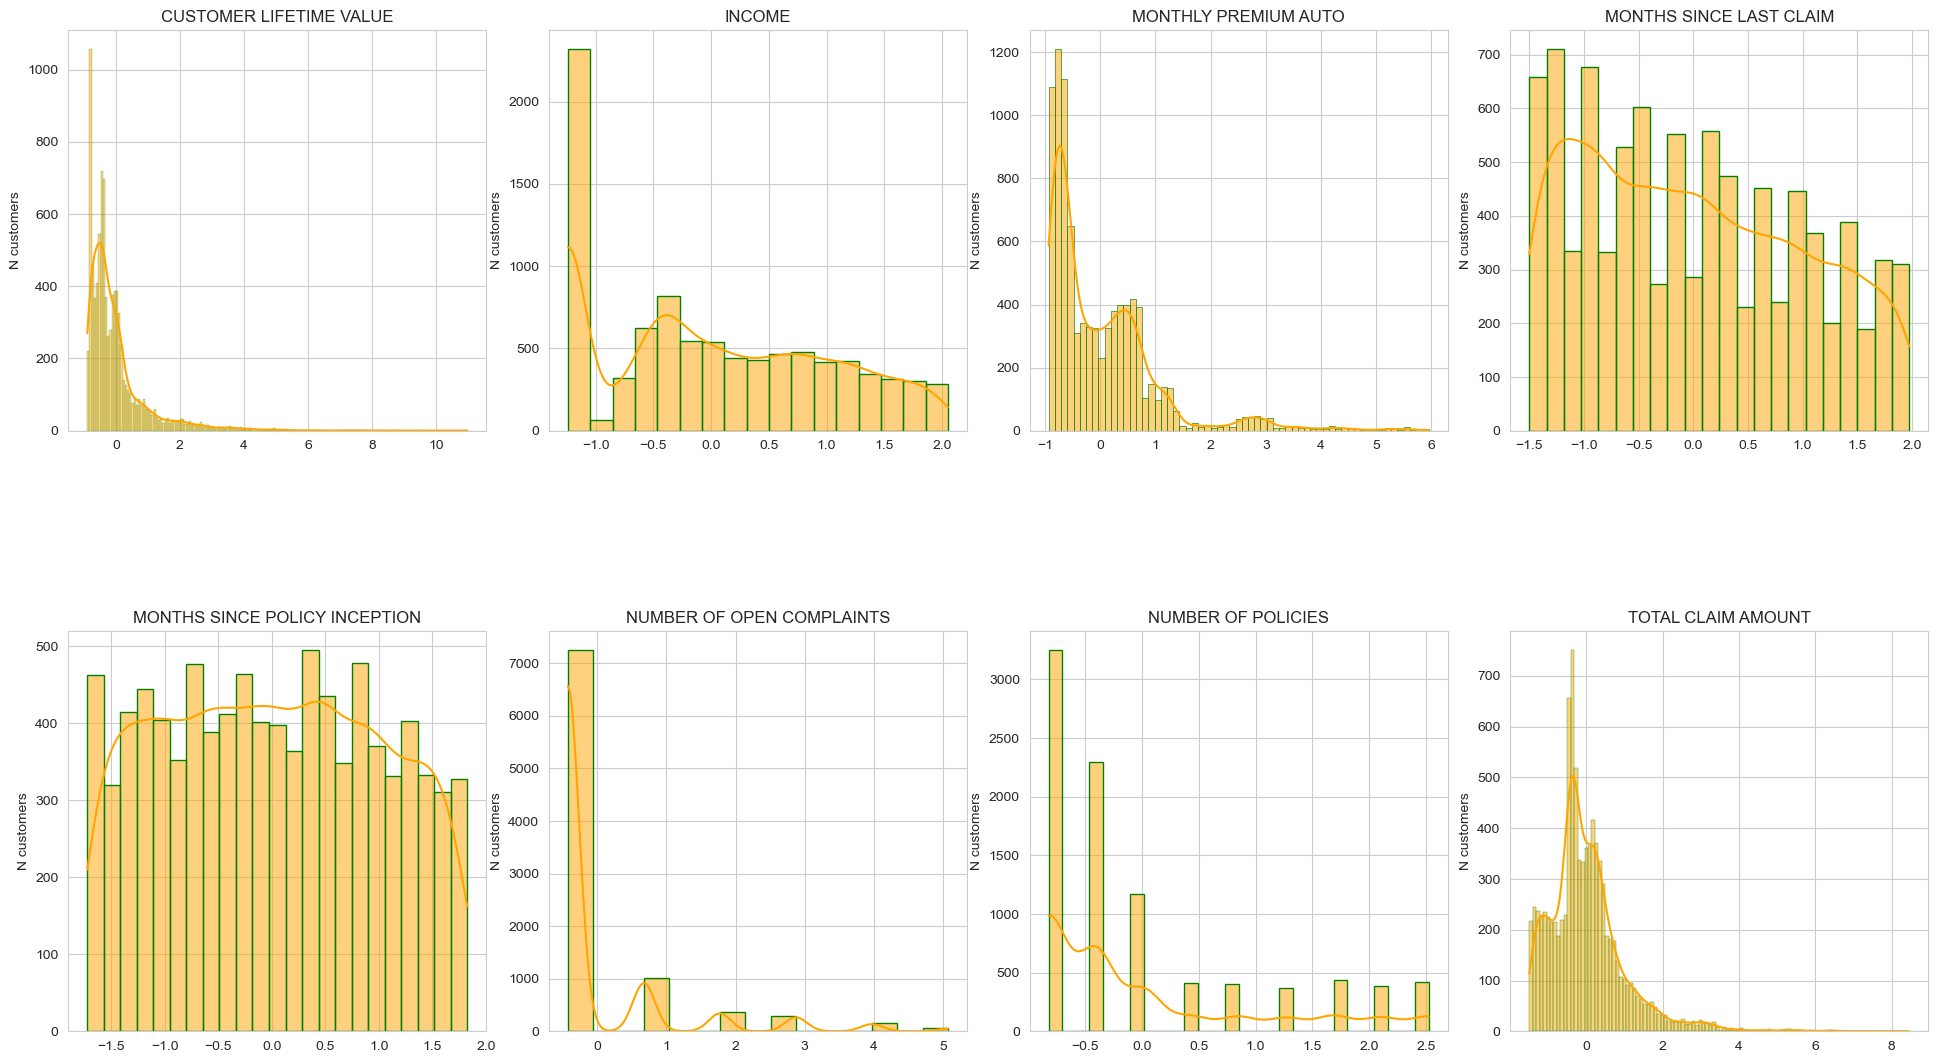

In [11]:
fig, axes = plt.subplots(2,4, figsize = (24,13))
plt.subplots_adjust(wspace = 0.15, hspace=0.5)

for col, ax in zip(num2_stand.columns, axes.flat):
    sns.histplot(num2_stand[col], color = 'orange', edgecolor = 'green', kde = True, ax = ax).set(xlabel = '', ylabel = 'N customers', title = col.upper())
plt.show()

#### *Again, not particularly interesting changes observed, apart from the sclaling of the values*

- with log-transformation

In [12]:
numericals.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [13]:
# Replacing values with mean seems appropriate for the purposes of the exercise, since the goal is not specifically to normalise the distributions, but instead to see how the transformation affects them and as a metric is is more representative of the potential values
num3 = numericals.copy()

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

for column in num3.columns:
    num3[column] = list(map(log_transfom_clean, num3[column]))
    num3[column] = num3[column].fillna(np.mean(num3[column]))

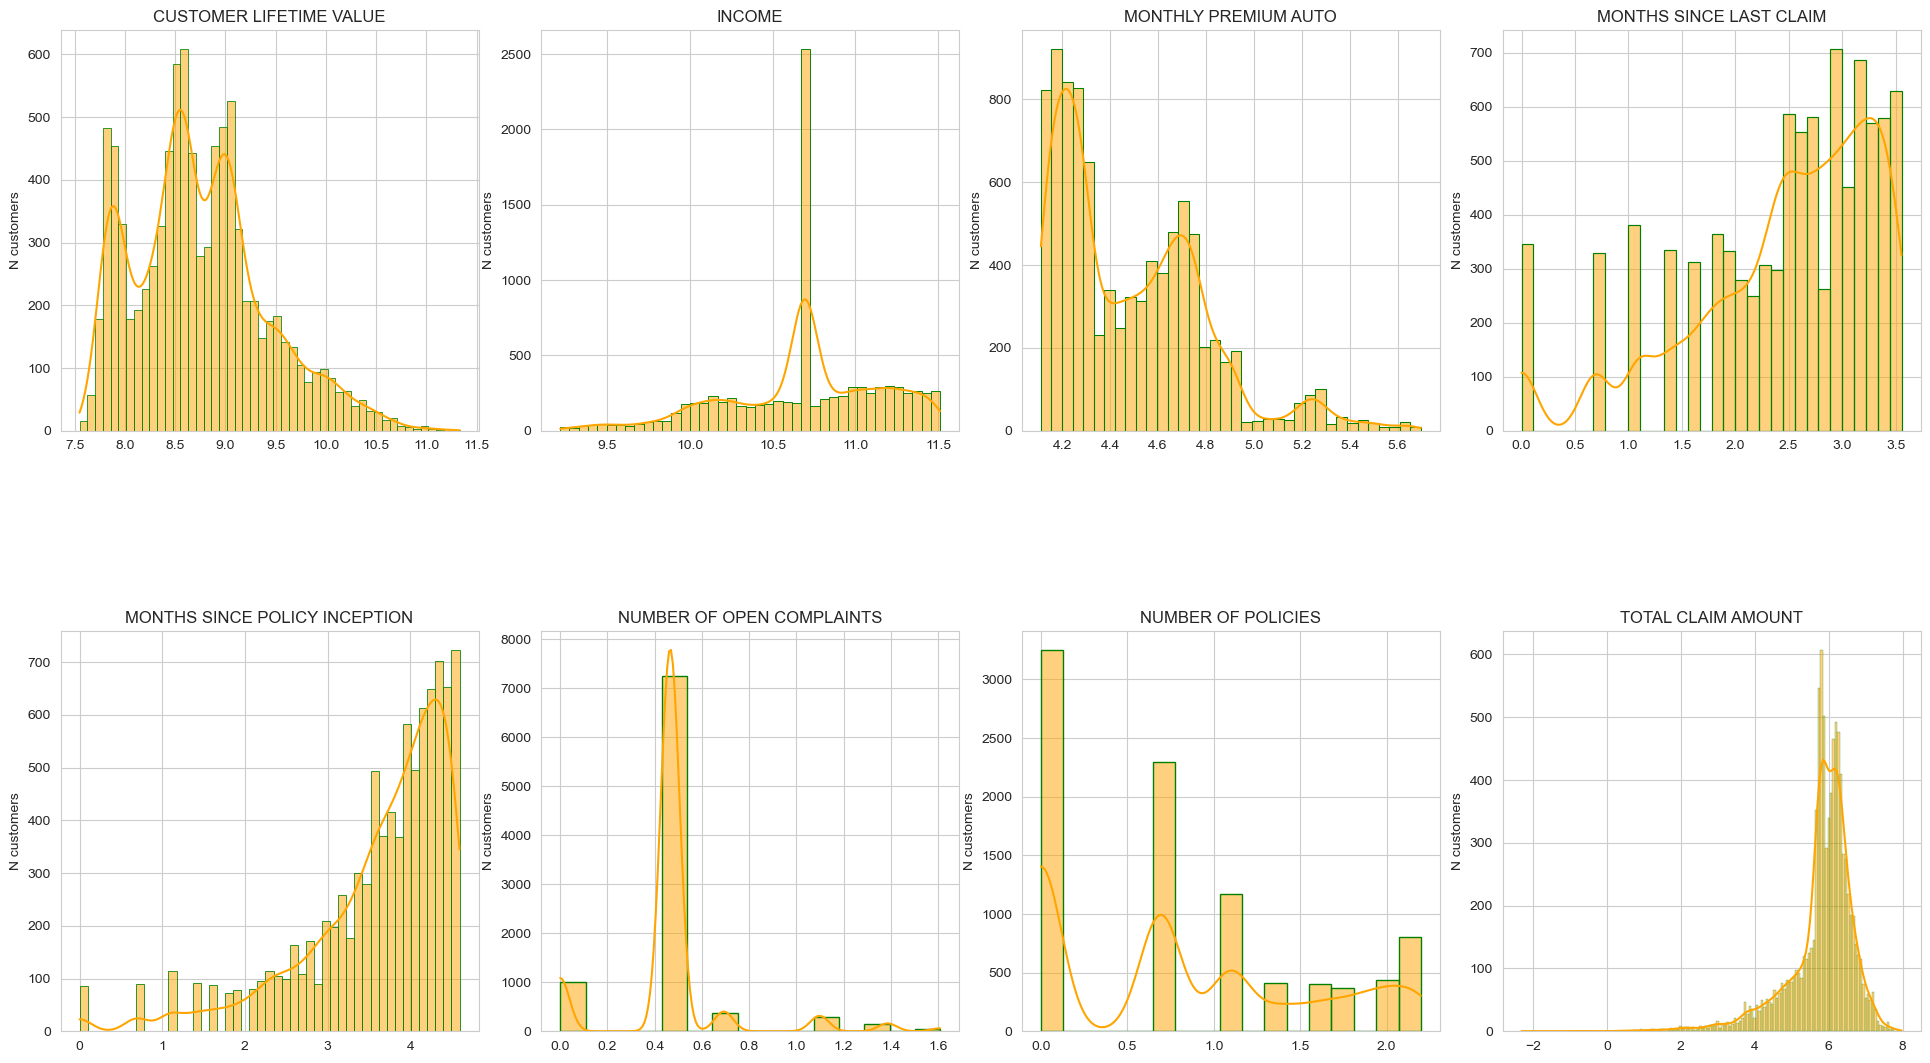

In [14]:
fig, axes = plt.subplots(2,4, figsize = (24,13))
plt.subplots_adjust(wspace = 0.15, hspace=0.5)

for col, ax in zip(num3.columns, axes.flat):
    sns.histplot(num3[col], color = 'orange', edgecolor = 'green', kde = True, ax = ax).set(xlabel = '', ylabel = 'N customers', title = col.upper())
plt.show()

#### *Log-transformations have a more profound effect on the distribution of these variables, as is expected, since values are removed and replaced with either the mean or the median in this case*
#### *There are a couple of distributions that have changed and resemble something closer to a normal distribution, although obviously skewed (months_since_policy_inception intensely skewed to the left and total_claim_amount, which looks the most like a normal distribution), but no exponential ones still*

- with Box-Cox transformation

In [15]:
num5 = numericals.copy()

for column in num5.columns:
    num5[column] = np.where(num5[column]<=0, np.NAN, num5[column])
    num5[column] = num5[column].fillna(num5[column].mean())
    t_data, _ci = stats.boxcox(num5[column])

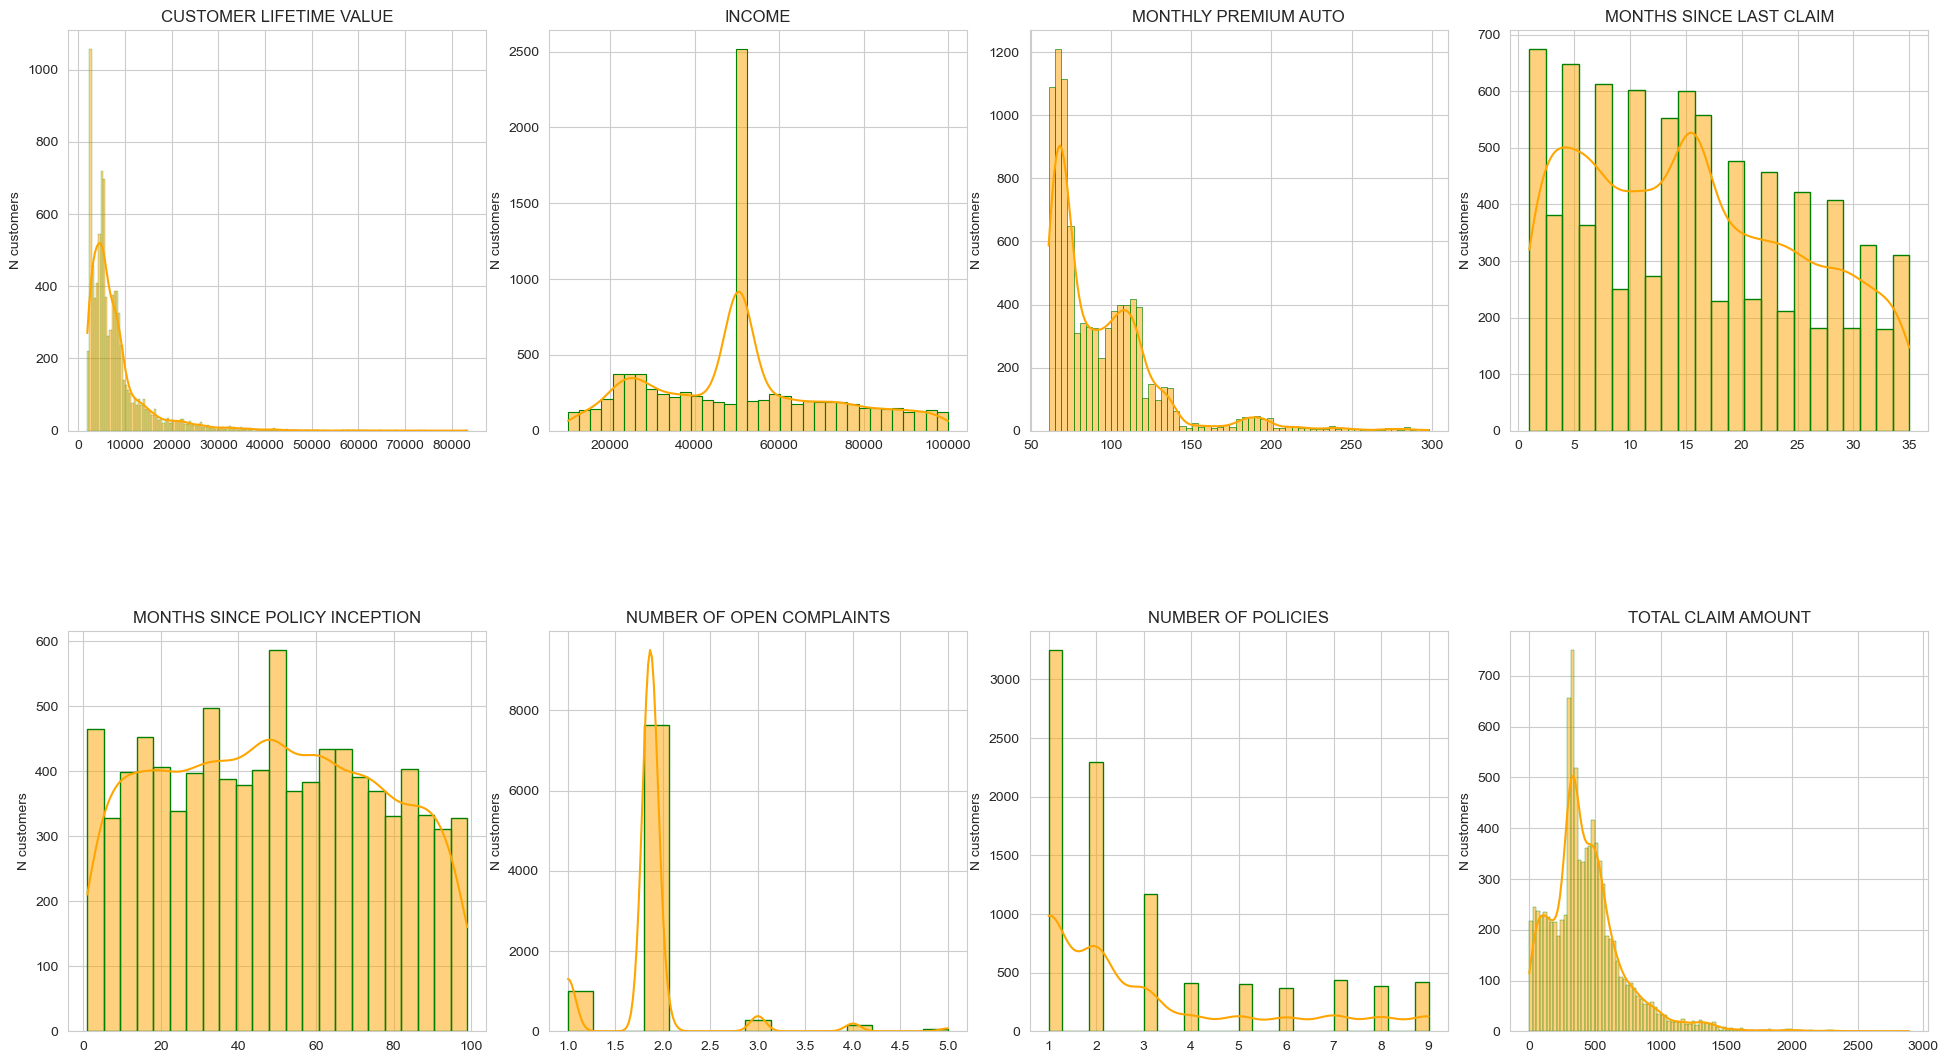

In [16]:
fig, axes = plt.subplots(2,4, figsize = (24,13))
plt.subplots_adjust(wspace = 0.15, hspace=0.5)

for col, ax in zip(num5.columns, axes.flat):
    sns.histplot(num5[col], color = 'orange', edgecolor = 'green', kde = True, ax = ax).set(xlabel = '', ylabel = 'N customers', title = col.upper())
plt.show()

#### *No exponential distributions again, but customer_lifetime_value looks a bit more like normal than with any of the other transformations, although it is skewed to the right. months_since_policy_inception appears like it tends towards uniformity with this handling.*